## ECOMMERCE COSMETICOS DANI CASTILLO

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Formato de display
pd.options.display.float_format = '{:15.2f}'.format

In [3]:
import sqlalchemy as sa

# Ruta absoluta con formato SQLite
ruta = 'sqlite:///C:/Users/DataScience/ONLINE_DS_THEBRIDGE_DaniCastillo/Project_Break_I__EDA/ecommerce/ecommerce_dani_castillo.db'

# Crear el motor de conexión
con = sa.create_engine(ruta)

# Verificar la conexión
with con.connect() as connection:
    print("Conexión exitosa con la base de datos.")

OperationalError: (sqlite3.OperationalError) unable to open database file
(Background on this error at: https://sqlalche.me/e/20/e3q8)

## INTEGRACION DE DATOS

In [3]:
from sqlalchemy import inspect
insp = inspect(con)
tablas = insp.get_table_names()
tablas

['2019-Dec', '2019-Nov', '2019-Oct', '2020-Feb', '2020-Jan']

In [4]:
pd.read_sql('2019-Oct', con)

,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,68,2019-10-01 00:01:46 UTC,view,5843665,1487580005092295511,None,f.o.x,9.44,462033176,a18e0999-61a1-4218-8f8f-61ec1d375361
1,72,2019-10-01 00:01:55 UTC,cart,5868461,1487580013069861041,None,italwax,3.57,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1
2,95,2019-10-01 00:02:50 UTC,view,5877456,1487580006300255120,None,jessnail,122.22,527418424,86e77869-afbc-4dff-9aa2-6b7dd8c90770
3,122,2019-10-01 00:03:41 UTC,view,5649270,1487580013749338323,None,concept,6.19,555448072,b5f72ceb-0730-44de-a932-d16db62390df
4,124,2019-10-01 00:03:44 UTC,view,18082,1487580005411062629,None,cnd,16.03,552006247,2d8f304b-de45-4e59-8f40-50c603843fe5
...,...,...,...,...,...,...,...,...,...,...
407920,4102227,2019-10-31 23:55:58 UTC,cart,4637,1487580011157258342,None,runail,0.37,562691482,9025c3a5-9c56-49c4-9d3d-95a6c15b69a3
407921,4102237,2019-10-31 23:56:34 UTC,view,4637,1487580011157258342,None,runail,0.37,562691482,9025c3a5-9c56-49c4-9d3d-95a6c15b69a3
407922,4102240,2019-10-31 23:56:40 UTC,view,4640,1487580011157258342,None,runail,0.37,562691482,9025c3a5-9c56-49c4-9d3d-95a6c15b69a3
407923,4102247,2019-10-31 23:56:50 UTC,cart,4654,1487580011157258342,None,runail,0.37,562691482,9025c3a5-9c56-49c4-9d3d-95a6c15b69a3


In [5]:
oct = pd.read_sql('2019-Oct', con)
nov = pd.read_sql('2019-Nov', con)
dic = pd.read_sql('2019-Dec', con)
ene = pd.read_sql('2020-Jan', con)
feb = pd.read_sql('2020-Feb', con)

In [6]:
df = pd.concat([oct,nov,dic,ene,feb], axis = 0)
df

,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,68,2019-10-01 00:01:46 UTC,view,5843665,1487580005092295511,None,f.o.x,9.44,462033176,a18e0999-61a1-4218-8f8f-61ec1d375361
1,72,2019-10-01 00:01:55 UTC,cart,5868461,1487580013069861041,None,italwax,3.57,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1
2,95,2019-10-01 00:02:50 UTC,view,5877456,1487580006300255120,None,jessnail,122.22,527418424,86e77869-afbc-4dff-9aa2-6b7dd8c90770
3,122,2019-10-01 00:03:41 UTC,view,5649270,1487580013749338323,None,concept,6.19,555448072,b5f72ceb-0730-44de-a932-d16db62390df
4,124,2019-10-01 00:03:44 UTC,view,18082,1487580005411062629,None,cnd,16.03,552006247,2d8f304b-de45-4e59-8f40-50c603843fe5
...,...,...,...,...,...,...,...,...,...,...
429785,4156660,2020-02-29 23:58:49 UTC,cart,5815662,1487580006317032337,None,None,0.92,147995998,5ff96629-3627-493e-a25b-5a871ec78c90
429786,4156663,2020-02-29 23:58:57 UTC,view,5815665,1487580006317032337,None,None,0.59,147995998,5ff96629-3627-493e-a25b-5a871ec78c90
429787,4156668,2020-02-29 23:59:05 UTC,cart,5815665,1487580006317032337,None,None,0.59,147995998,5ff96629-3627-493e-a25b-5a871ec78c90
429788,4156675,2020-02-29 23:59:28 UTC,view,5817692,1487580010872045658,None,None,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d


## CALIDAD DE DATOS 


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2095076 entries, 0 to 429789
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   index          int64  
 1   event_time     object 
 2   event_type     object 
 3   product_id     int64  
 4   category_id    int64  
 5   category_code  object 
 6   brand          object 
 7   price          float64
 8   user_id        int64  
 9   user_session   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 175.8+ MB


## CORRECCION DATOS

In [8]:
# eliminamos la columna index.
df.drop(columns = 'index', inplace = True)

In [9]:
# pasar event_time a datetime sin UTC
df.event_time = pd.to_datetime(df['event_time']).dt.tz_localize(None)
df


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:01:46,view,5843665,1487580005092295511,None,f.o.x,9.44,462033176,a18e0999-61a1-4218-8f8f-61ec1d375361
1,2019-10-01 00:01:55,cart,5868461,1487580013069861041,None,italwax,3.57,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1
2,2019-10-01 00:02:50,view,5877456,1487580006300255120,None,jessnail,122.22,527418424,86e77869-afbc-4dff-9aa2-6b7dd8c90770
3,2019-10-01 00:03:41,view,5649270,1487580013749338323,None,concept,6.19,555448072,b5f72ceb-0730-44de-a932-d16db62390df
4,2019-10-01 00:03:44,view,18082,1487580005411062629,None,cnd,16.03,552006247,2d8f304b-de45-4e59-8f40-50c603843fe5
...,...,...,...,...,...,...,...,...,...
429785,2020-02-29 23:58:49,cart,5815662,1487580006317032337,None,None,0.92,147995998,5ff96629-3627-493e-a25b-5a871ec78c90
429786,2020-02-29 23:58:57,view,5815665,1487580006317032337,None,None,0.59,147995998,5ff96629-3627-493e-a25b-5a871ec78c90
429787,2020-02-29 23:59:05,cart,5815665,1487580006317032337,None,None,0.59,147995998,5ff96629-3627-493e-a25b-5a871ec78c90
429788,2020-02-29 23:59:28,view,5817692,1487580010872045658,None,None,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2095076 entries, 0 to 429789
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   event_time     datetime64[ns]
 1   event_type     object        
 2   product_id     int64         
 3   category_id    int64         
 4   category_code  object        
 5   brand          object        
 6   price          float64       
 7   user_id        int64         
 8   user_session   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 159.8+ MB


## NOMBRES VARIABLES

In [11]:
df.columns = ['fecha',
              'evento',
              'producto',
              'categoria',
              'categoria_cod',
              'marca',
              'precio',
              'usuario',
              'sesion']
df

,fecha,evento,producto,categoria,categoria_cod,marca,precio,usuario,sesion
0,2019-10-01 00:01:46,view,5843665,1487580005092295511,None,f.o.x,9.44,462033176,a18e0999-61a1-4218-8f8f-61ec1d375361
1,2019-10-01 00:01:55,cart,5868461,1487580013069861041,None,italwax,3.57,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1
2,2019-10-01 00:02:50,view,5877456,1487580006300255120,None,jessnail,122.22,527418424,86e77869-afbc-4dff-9aa2-6b7dd8c90770
3,2019-10-01 00:03:41,view,5649270,1487580013749338323,None,concept,6.19,555448072,b5f72ceb-0730-44de-a932-d16db62390df
4,2019-10-01 00:03:44,view,18082,1487580005411062629,None,cnd,16.03,552006247,2d8f304b-de45-4e59-8f40-50c603843fe5
...,...,...,...,...,...,...,...,...,...
429785,2020-02-29 23:58:49,cart,5815662,1487580006317032337,None,None,0.92,147995998,5ff96629-3627-493e-a25b-5a871ec78c90
429786,2020-02-29 23:58:57,view,5815665,1487580006317032337,None,None,0.59,147995998,5ff96629-3627-493e-a25b-5a871ec78c90
429787,2020-02-29 23:59:05,cart,5815665,1487580006317032337,None,None,0.59,147995998,5ff96629-3627-493e-a25b-5a871ec78c90
429788,2020-02-29 23:59:28,view,5817692,1487580010872045658,None,None,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d


## Análisis de nulos


In [12]:
df.isna().sum().sort_values(ascending = False)

categoria_cod    2060411
marca             891646
sesion               506
fecha                  0
evento                 0
categoria              0
producto               0
precio                 0
usuario                0
dtype: int64

## Conclusiones:

* categoria_cod tiene casi todos los registros a nulo (98%)
* marca tiene casi la mitad de los registros a nulo (43%)
* hay 500 nulos en sesión (0.02%)

## Acciones:

* eliminar las variables categoria_cod y marca porque no tenemos posibilidad de conocer esa info.
* eliminar solo los nulos de sesión ya que es una variable relevante.

In [13]:
df = df.drop(columns = ['categoria_cod','marca']).dropna()
df

,fecha,evento,producto,categoria,precio,usuario,sesion
0,2019-10-01 00:01:46,view,5843665,1487580005092295511,9.44,462033176,a18e0999-61a1-4218-8f8f-61ec1d375361
1,2019-10-01 00:01:55,cart,5868461,1487580013069861041,3.57,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1
2,2019-10-01 00:02:50,view,5877456,1487580006300255120,122.22,527418424,86e77869-afbc-4dff-9aa2-6b7dd8c90770
3,2019-10-01 00:03:41,view,5649270,1487580013749338323,6.19,555448072,b5f72ceb-0730-44de-a932-d16db62390df
4,2019-10-01 00:03:44,view,18082,1487580005411062629,16.03,552006247,2d8f304b-de45-4e59-8f40-50c603843fe5
...,...,...,...,...,...,...,...
429785,2020-02-29 23:58:49,cart,5815662,1487580006317032337,0.92,147995998,5ff96629-3627-493e-a25b-5a871ec78c90
429786,2020-02-29 23:58:57,view,5815665,1487580006317032337,0.59,147995998,5ff96629-3627-493e-a25b-5a871ec78c90
429787,2020-02-29 23:59:05,cart,5815665,1487580006317032337,0.59,147995998,5ff96629-3627-493e-a25b-5a871ec78c90
429788,2020-02-29 23:59:28,view,5817692,1487580010872045658,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d


In [14]:
### al eliminar las variables marca, han desaparecido los nulos de sesion
df.isna().sum().sort_values(ascending = False)

fecha        0
evento       0
producto     0
categoria    0
precio       0
usuario      0
sesion       0
dtype: int64

## Análisis de las variables numéricas

In [15]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
fecha,2094570,2019-12-16 20:35:50.603889920,2019-10-01 00:01:46,2019-11-08 18:35:03.249999872,2019-12-14 07:10:11.500000,2020-01-26 06:45:52.249999872,2020-02-29 23:59:54,NaN
producto,2094570.00,5487103.56,3752.00,5724652.00,5811665.00,5858353.00,5932595.00,1300923.90
categoria,2094570.00,1553112489392098048.00,1487580004807082752.00,1487580005754995456.00,1487580008246412288.00,1487580013489291520.00,2242903426784559104.00,167907497920480576.00
precio,2094570.00,8.42,-47.62,2.05,4.00,6.86,327.78,19.14
usuario,2094570.00,521077545.56,4661182.00,480613387.00,553341613.00,578406571.00,622087993.00,87553855.76


In [16]:
# hay negativos en precio, hay que investigar
df[df.precio <= 0]

,fecha,evento,producto,categoria,precio,usuario,sesion
343,2019-10-01 02:15:41,view,5892052,1487580010377117763,0.00,555455025,320f6021-30ac-4a58-ae17-bac1cc32aac3
924,2019-10-01 05:16:30,view,5889621,1487580010561667147,0.00,523988665,00849bd2-fcd2-4cb4-af31-4e264f151848
933,2019-10-01 05:18:03,view,5889622,1487580010561667147,0.00,523988665,80cfe614-f0a5-4101-a2b6-a21227590470
937,2019-10-01 05:18:46,view,5889623,1487580010561667147,0.00,523988665,c2cd0464-3d2b-48e2-9667-bac248fe297a
1077,2019-10-01 05:38:01,view,5889627,1487580010561667147,0.00,523988665,8b2bf9d8-43f0-43b2-bed3-13b2c956cada
...,...,...,...,...,...,...,...
428011,2020-02-29 20:04:49,cart,5824841,1897124478404526487,0.00,469761446,8bf369b4-92c0-4fb8-88a5-8a2dd0947e46
428012,2020-02-29 20:04:49,cart,5826413,1487580005511725929,0.00,469761446,8bf369b4-92c0-4fb8-88a5-8a2dd0947e46
428013,2020-02-29 20:04:49,cart,5832437,1487580007675986893,0.00,469761446,8bf369b4-92c0-4fb8-88a5-8a2dd0947e46
428014,2020-02-29 20:04:49,cart,5851606,2055161088059638328,0.00,469761446,8bf369b4-92c0-4fb8-88a5-8a2dd0947e46



Son unos 20000 registros, podríamos eliminarlos. (1%)

Pero antes ¿se concentran quizá en algún producto determinado?

In [17]:
df[df.precio <= 0].producto.value_counts().head(10)

producto
5896186    79
5903915    50
5873428    37
5851294    29
5851304    29
5837624    28
5851272    27
5712583    27
5907812    26
5899512    26
Name: count, dtype: int64

No parece que sea problema de un producto concreto, así que vamos a eliminar todos los registros.

En este cas no lo analizaremos pero con seguridad seran productos devolucion.

In [18]:
df = df[df.precio >=0]
df

,fecha,evento,producto,categoria,precio,usuario,sesion
0,2019-10-01 00:01:46,view,5843665,1487580005092295511,9.44,462033176,a18e0999-61a1-4218-8f8f-61ec1d375361
1,2019-10-01 00:01:55,cart,5868461,1487580013069861041,3.57,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1
2,2019-10-01 00:02:50,view,5877456,1487580006300255120,122.22,527418424,86e77869-afbc-4dff-9aa2-6b7dd8c90770
3,2019-10-01 00:03:41,view,5649270,1487580013749338323,6.19,555448072,b5f72ceb-0730-44de-a932-d16db62390df
4,2019-10-01 00:03:44,view,18082,1487580005411062629,16.03,552006247,2d8f304b-de45-4e59-8f40-50c603843fe5
...,...,...,...,...,...,...,...
429785,2020-02-29 23:58:49,cart,5815662,1487580006317032337,0.92,147995998,5ff96629-3627-493e-a25b-5a871ec78c90
429786,2020-02-29 23:58:57,view,5815665,1487580006317032337,0.59,147995998,5ff96629-3627-493e-a25b-5a871ec78c90
429787,2020-02-29 23:59:05,cart,5815665,1487580006317032337,0.59,147995998,5ff96629-3627-493e-a25b-5a871ec78c90
429788,2020-02-29 23:59:28,view,5817692,1487580010872045658,0.79,619841242,18af673b-7fb9-4202-a66d-5c855bc0fd2d


## Análisis de las variables categóricas

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2094559 entries, 0 to 429789
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   fecha      datetime64[ns]
 1   evento     object        
 2   producto   int64         
 3   categoria  int64         
 4   precio     float64       
 5   usuario    int64         
 6   sesion     object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 127.8+ MB


## Análisis de las variables categóricas

In [ ]:
df.evento.nunique()

In [21]:
df.evento.value_counts()


evento
view                965889
cart                585437
remove_from_cart    415669
purchase            127564
Name: count, dtype: int64

In [22]:
df.producto.nunique()

46032

In [23]:
df.categoria.nunique()

508

## Índice
Vamos a poner la fecha como el index.

In [24]:
df.set_index('fecha', inplace = True)
df

,evento,producto,categoria,precio,usuario,sesion
fecha,,,,,,
2019-10-01 00:01:46,view,5843665,1487580005092295511,9.44,462033176,a18e0999-61a1-4218-8f8f-61ec1d375361
2019-10-01 00:01:55,cart,5868461,1487580013069861041,3.57,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1
2019-10-01 00:02:50,view,5877456,1487580006300255120,122.22,527418424,86e77869-afbc-4dff-9aa2-6b7dd8c90770
2019-10-01 00:03:41,view,5649270,1487580013749338323,6.19,555448072,b5f72ceb-0730-44de-a932-d16db62390df
2019-10-01 00:03:44,view,18082,1487580005411062629,16.03,552006247,2d8f304b-de45-4e59-8f40-50c603843fe5
...,...,...,...,...,...,...
2020-02-29 23:58:49,cart,5815662,1487580006317032337,0.92,147995998,5ff96629-3627-493e-a25b-5a871ec78c90
2020-02-29 23:58:57,view,5815665,1487580006317032337,0.59,147995998,5ff96629-3627-493e-a25b-5a871ec78c90
2020-02-29 23:59:05,cart,5815665,1487580006317032337,0.59,147995998,5ff96629-3627-493e-a25b-5a871ec78c90


## TRANSFORMACION DE DATOS
Para estudiar dias de compra, vamos a crear 3 tipos de nuevas variables

* Extraer componentes
* Variables de calendario: Festivos locales (Rusia)
* Indicadores exógenos: Días no necesariamente festivos pero con interés comercial: Black Friday, Cyber Monday, Reyes, San Valentin

In [25]:
# Componentes de la fecha
def componentes_fecha(dataframe):
    date = dataframe.index.date
    año = dataframe.index.year
    mes = dataframe.index.month
    dia = dataframe.index.day
    hora = dataframe.index.hour
    minuto = dataframe.index.minute
    
    return(pd.DataFrame({'date':date, 'año':año,'mes':mes, 'dia':dia, 'hora':hora, 'minuto':minuto}))

In [26]:
df = pd.concat([df.reset_index(),componentes_fecha(df)], axis = 1).set_index('fecha')
df

,evento,producto,categoria,precio,usuario,sesion,date,año,mes,dia,hora,minuto
fecha,,,,,,,,,,,,
2019-10-01 00:01:46,view,5843665,1487580005092295511,9.44,462033176,a18e0999-61a1-4218-8f8f-61ec1d375361,2019-10-01,2019,10,1,0,1
2019-10-01 00:01:55,cart,5868461,1487580013069861041,3.57,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1,2019-10-01,2019,10,1,0,1
2019-10-01 00:02:50,view,5877456,1487580006300255120,122.22,527418424,86e77869-afbc-4dff-9aa2-6b7dd8c90770,2019-10-01,2019,10,1,0,2
2019-10-01 00:03:41,view,5649270,1487580013749338323,6.19,555448072,b5f72ceb-0730-44de-a932-d16db62390df,2019-10-01,2019,10,1,0,3
2019-10-01 00:03:44,view,18082,1487580005411062629,16.03,552006247,2d8f304b-de45-4e59-8f40-50c603843fe5,2019-10-01,2019,10,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-29 23:58:49,cart,5815662,1487580006317032337,0.92,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,2020-02-29,2020,2,29,23,58
2020-02-29 23:58:57,view,5815665,1487580006317032337,0.59,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,2020-02-29,2020,2,29,23,58
2020-02-29 23:59:05,cart,5815665,1487580006317032337,0.59,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,2020-02-29,2020,2,29,23,59


## Variables de calendario: festivos
Para incorporar festivos podemos usar el paquete holidays.

No es perfecto, pero nos da mucha flexibilidad porque tiene fiestas de varios países e incluso a nivel comunidades.

Y podemos ver el listado de países y el uso básico en:

https://github.com/dr-prodigy/python-holidays

Por ejemplo vamos a hacer la prueba con España.

In [27]:
import holidays

festivo_es = holidays.ES(years=2021)

for fecha, fiesta in festivo_es.items():
    print(fecha,fiesta)

2021-01-01 Año nuevo
2021-01-06 Epifanía del Señor
2021-04-02 Viernes Santo
2021-05-01 Fiesta del Trabajo
2021-10-12 Fiesta Nacional de España
2021-11-01 Todos los Santos
2021-12-06 Día de la Constitución Española
2021-12-08 Inmaculada Concepción
2021-12-25 Natividad del Señor


Definimos el objeto festivo_ru ya que este ecommerce es Ruso.

Vamos a incorporar una variable que diga en cada registro si era un día festivo o no.

In [28]:
festivo_ru = holidays.RU(years=2020)
festivo_ru

{datetime.date(2020, 1, 1): 'Новогодние каникулы', datetime.date(2020, 1, 2): 'Новогодние каникулы', datetime.date(2020, 1, 3): 'Новогодние каникулы', datetime.date(2020, 1, 4): 'Новогодние каникулы', datetime.date(2020, 1, 5): 'Новогодние каникулы', datetime.date(2020, 1, 6): 'Новогодние каникулы', datetime.date(2020, 1, 8): 'Новогодние каникулы', datetime.date(2020, 1, 7): 'Рождество Христово', datetime.date(2020, 2, 23): 'День защитника Отечества', datetime.date(2020, 3, 8): 'Международный женский день', datetime.date(2020, 5, 1): 'Праздник Весны и Труда', datetime.date(2020, 5, 9): 'День Победы', datetime.date(2020, 6, 12): 'День России', datetime.date(2020, 11, 4): 'День народного единства', datetime.date(2020, 5, 4): 'Выходной (перенесено с 04.01.2020)', datetime.date(2020, 5, 5): 'Выходной (перенесено с 05.01.2020)', datetime.date(2020, 2, 24): 'Выходной (перенесено с 23.02.2020)', datetime.date(2020, 3, 9): 'Выходной (перенесено с 08.03.2020)', datetime.date(2020, 5, 11): 'Выхо

In [29]:
df['festivo'] = df.date.apply(lambda x: 1 if (x in festivo_ru) else 0)
df

,evento,producto,categoria,precio,usuario,sesion,date,año,mes,dia,hora,minuto,festivo
fecha,,,,,,,,,,,,,
2019-10-01 00:01:46,view,5843665,1487580005092295511,9.44,462033176,a18e0999-61a1-4218-8f8f-61ec1d375361,2019-10-01,2019,10,1,0,1,0
2019-10-01 00:01:55,cart,5868461,1487580013069861041,3.57,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1,2019-10-01,2019,10,1,0,1,0
2019-10-01 00:02:50,view,5877456,1487580006300255120,122.22,527418424,86e77869-afbc-4dff-9aa2-6b7dd8c90770,2019-10-01,2019,10,1,0,2,0
2019-10-01 00:03:41,view,5649270,1487580013749338323,6.19,555448072,b5f72ceb-0730-44de-a932-d16db62390df,2019-10-01,2019,10,1,0,3,0
2019-10-01 00:03:44,view,18082,1487580005411062629,16.03,552006247,2d8f304b-de45-4e59-8f40-50c603843fe5,2019-10-01,2019,10,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-29 23:58:49,cart,5815662,1487580006317032337,0.92,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,2020-02-29,2020,2,29,23,58,0
2020-02-29 23:58:57,view,5815665,1487580006317032337,0.59,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,2020-02-29,2020,2,29,23,58,0
2020-02-29 23:59:05,cart,5815665,1487580006317032337,0.59,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,2020-02-29,2020,2,29,23,59,0


Comprobamos los festivos.

In [30]:
df[df.festivo == 1].date.value_counts().sort_index()

date
2019-11-04    16435
2020-01-01     7648
2020-01-02    10779
2020-01-03    10618
2020-01-04    13087
2020-01-05    14558
2020-01-06    10625
2020-01-07    12927
2020-01-08    14007
2020-02-23     9821
2020-02-24    15542
Name: count, dtype: int64

## Indicadores exógenos
Vamos a añadir indicadores para Black Friday y San Valentín.

In [31]:
df['black_friday'] = 0
df.loc['2019-11-29','black_friday'] = 1

df['san_valentin'] = 0
df.loc['2020-02-14','san_valentin'] = 1

In [32]:
df['black_friday'].value_counts()


black_friday
0    2072182
1      22377
Name: count, dtype: int64

Comprobamos los festivos.

In [33]:
df['san_valentin'].value_counts()

san_valentin
0    2082132
1      12427
Name: count, dtype: int64

## TABLON ANALITICO FINAL

Vamos a poner las columnas en un orden más natural.


In [34]:
df.head()

,evento,producto,categoria,precio,usuario,sesion,date,año,mes,dia,hora,minuto,festivo,black_friday,san_valentin
fecha,,,,,,,,,,,,,,,
2019-10-01 00:01:46,view,5843665,1487580005092295511,9.44,462033176,a18e0999-61a1-4218-8f8f-61ec1d375361,2019-10-01,2019,10,1,0,1,0,0,0
2019-10-01 00:01:55,cart,5868461,1487580013069861041,3.57,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1,2019-10-01,2019,10,1,0,1,0,0,0
2019-10-01 00:02:50,view,5877456,1487580006300255120,122.22,527418424,86e77869-afbc-4dff-9aa2-6b7dd8c90770,2019-10-01,2019,10,1,0,2,0,0,0
2019-10-01 00:03:41,view,5649270,1487580013749338323,6.19,555448072,b5f72ceb-0730-44de-a932-d16db62390df,2019-10-01,2019,10,1,0,3,0,0,0
2019-10-01 00:03:44,view,18082,1487580005411062629,16.03,552006247,2d8f304b-de45-4e59-8f40-50c603843fe5,2019-10-01,2019,10,1,0,3,0,0,0


In [35]:
variables = df.columns.to_list()
variables

['evento',
 'producto',
 'categoria',
 'precio',
 'usuario',
 'sesion',
 'date',
 'año',
 'mes',
 'dia',
 'hora',
 'minuto',
 'festivo',
 'black_friday',
 'san_valentin']

In [36]:
orden = ['usuario',
         'sesion',
         'categoria',
         'evento',
         'producto',
         'precio']

orden

['usuario', 'sesion', 'categoria', 'evento', 'producto', 'precio']

In [37]:
resto = [nombre for nombre in variables if nombre not in orden]

resto

['date',
 'año',
 'mes',
 'dia',
 'hora',
 'minuto',
 'festivo',
 'black_friday',
 'san_valentin']

In [38]:
df = df[orden + resto]
df

,usuario,sesion,categoria,evento,producto,precio,date,año,mes,dia,hora,minuto,festivo,black_friday,san_valentin
fecha,,,,,,,,,,,,,,,
2019-10-01 00:01:46,462033176,a18e0999-61a1-4218-8f8f-61ec1d375361,1487580005092295511,view,5843665,9.44,2019-10-01,2019,10,1,0,1,0,0,0
2019-10-01 00:01:55,514753614,e2fecb2d-22d0-df2c-c661-15da44b3ccf1,1487580013069861041,cart,5868461,3.57,2019-10-01,2019,10,1,0,1,0,0,0
2019-10-01 00:02:50,527418424,86e77869-afbc-4dff-9aa2-6b7dd8c90770,1487580006300255120,view,5877456,122.22,2019-10-01,2019,10,1,0,2,0,0,0
2019-10-01 00:03:41,555448072,b5f72ceb-0730-44de-a932-d16db62390df,1487580013749338323,view,5649270,6.19,2019-10-01,2019,10,1,0,3,0,0,0
2019-10-01 00:03:44,552006247,2d8f304b-de45-4e59-8f40-50c603843fe5,1487580005411062629,view,18082,16.03,2019-10-01,2019,10,1,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-29 23:58:49,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,1487580006317032337,cart,5815662,0.92,2020-02-29,2020,2,29,23,58,0,0,0
2020-02-29 23:58:57,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,1487580006317032337,view,5815665,0.59,2020-02-29,2020,2,29,23,58,0,0,0
2020-02-29 23:59:05,147995998,5ff96629-3627-493e-a25b-5a871ec78c90,1487580006317032337,cart,5815665,0.59,2020-02-29,2020,2,29,23,59,0,0,0


## ¿Cómo funciona el Customer Journey?

In [39]:
eventos = df.evento.value_counts()
eventos

evento
view                965889
cart                585437
remove_from_cart    415669
purchase            127564
Name: count, dtype: int64

In [40]:
kpi_visualizaciones_p = 100
kpi_carrito_p = eventos.loc['cart'] / eventos.loc['view'] * 100
kpi_abandono_p = eventos.loc['remove_from_cart'] / eventos.loc['cart'] * 100
kpi_compra_p = eventos.loc['purchase'] / eventos.loc['cart'] * 100

kpis = pd.DataFrame({'kpi':['visitas','carrito','compra'],
                     'valor':[kpi_visualizaciones_p,kpi_carrito_p,kpi_compra_p]})

kpis

,kpi,valor
0,visitas,100.00
1,carrito,60.61
2,compra,21.79


In [43]:
from plotly import graph_objects as go

fig = go.Figure(go.Funnel(
    y = kpis.kpi,
    x = kpis.valor.round(2),
    marker = {'color': ['red','blue','green']},
    opacity = 0.5
    ))

fig.update_layout(
    title = 'Funnel Conversión Inicial')
    
fig.show()

Conclusiones:

* Las tasas de partida son un 60% de carrito sobre visualiazaciones y un 22% de compra sobre carrito
* Por tanto existe un 40% de visitas sobre las que hay que trabajar para conseguir más carritos, y un 78% de carritos sobre los que trabajar para conseguir más compras

## ¿Cuántos productos se ven, se añaden al carro, se abandonan y se compran de media en cada sesión?

Conocer los principales kpis por sesión nos permite establecer la línea base para ir midiendo los resultados de las acciones de CRO.

A diferencia del análisis macro del funnel este análisis es por sesión, lo cual lo hace más operativo.

Primero creamos un dataframe con la granularidad a nivel de sesión y evento que necesitamos.

In [46]:
sesion_prod = df.groupby(['sesion','evento']).producto.count()
sesion_prod

sesion                                evento
0000597b-de39-4a77-9fe5-02c8792ca14e  view      3
0000645a-8160-4a3d-91bf-154bff0a22e3  view      2
000090e1-da13-42b1-a31b-91a9ee5e6a88  view      1
0000b3cb-5422-4bf2-b8fe-5c1831d0dc1b  view      1
0000de26-bd58-42c9-9173-4763c76b398e  view      1
                                               ..
ffff6695-b64d-4a67-aa14-34b3b7f63c3f  view      2
ffff7d69-b706-4c64-9d6d-da57a04bc32b  view      1
ffff8044-2a22-4846-8a72-999e870abbe9  view      1
ffff91d4-7879-4a4b-8b26-c67915a27dc8  view      1
ffffbe0a-d2c2-47c7-afab-680bfdfda50d  view      1
Name: producto, Length: 584632, dtype: int64

In [47]:
sesion_prod = sesion_prod.unstack().fillna(0)
sesion_prod

evento,cart,purchase,remove_from_cart,view
sesion,,,,
0000597b-de39-4a77-9fe5-02c8792ca14e,0.00,0.00,0.00,3.00
0000645a-8160-4a3d-91bf-154bff0a22e3,0.00,0.00,0.00,2.00
000090e1-da13-42b1-a31b-91a9ee5e6a88,0.00,0.00,0.00,1.00
0000b3cb-5422-4bf2-b8fe-5c1831d0dc1b,0.00,0.00,0.00,1.00
0000de26-bd58-42c9-9173-4763c76b398e,0.00,0.00,0.00,1.00
...,...,...,...,...
ffff6695-b64d-4a67-aa14-34b3b7f63c3f,0.00,0.00,0.00,2.00
ffff7d69-b706-4c64-9d6d-da57a04bc32b,0.00,0.00,0.00,1.00
ffff8044-2a22-4846-8a72-999e870abbe9,0.00,0.00,0.00,1.00


reordenadmos columnas


In [49]:
sesion_prod = sesion_prod[['view','cart','remove_from_cart','purchase']]
sesion_prod

evento,view,cart,remove_from_cart,purchase
sesion,,,,
0000597b-de39-4a77-9fe5-02c8792ca14e,3.00,0.00,0.00,0.00
0000645a-8160-4a3d-91bf-154bff0a22e3,2.00,0.00,0.00,0.00
000090e1-da13-42b1-a31b-91a9ee5e6a88,1.00,0.00,0.00,0.00
0000b3cb-5422-4bf2-b8fe-5c1831d0dc1b,1.00,0.00,0.00,0.00
0000de26-bd58-42c9-9173-4763c76b398e,1.00,0.00,0.00,0.00
...,...,...,...,...
ffff6695-b64d-4a67-aa14-34b3b7f63c3f,2.00,0.00,0.00,0.00
ffff7d69-b706-4c64-9d6d-da57a04bc32b,1.00,0.00,0.00,0.00
ffff8044-2a22-4846-8a72-999e870abbe9,1.00,0.00,0.00,0.00


Calculamos la media de cada evento por sesión.

In [50]:
media_eventos_sesion = sesion_prod.mean()
media_eventos_sesion

evento
view                          2.15
cart                          1.30
remove_from_cart              0.93
purchase                      0.28
dtype: float64

Conclusión:

En cada sesión, de media:

* Se ven 2.2 productos
* Se añaden 1.3 productos al carrito
* Se eliminan 0.9 productos del carrito
* Se compran 0.3 productos

Como decíamos, éstos son los números que deberemos incrementar con las acciones de CRO.

## ¿Existen diferencias entre los eventos por horas?
Creamos el dataframe a granularidad evento y hora.

In [52]:
eventos_hora = df.groupby(['evento','hora']).producto.count()
eventos_hora

evento  hora
cart    0        6482
        1        5562
        2        6444
        3       10640
        4       11393
                ...  
view    19      63877
        20      57439
        21      38985
        22      23090
        23      13337
Name: producto, Length: 96, dtype: int64

convertimos eventos a columnas

In [53]:
eventos_hora = eventos_hora.unstack(level = 0)
eventos_hora

evento,cart,purchase,remove_from_cart,view
hora,,,,
0,6482,962,3238,8757
1,5562,1128,3930,7297
2,6444,1220,3511,8396
3,10640,1535,6489,11821
4,11393,2389,8131,18408
5,17032,3491,11943,27544
6,22048,5125,16264,38404
7,27187,5951,17927,46558
8,29803,7158,21192,49978


Vamos a visualizar cómo se distribuyen los eventos por hora.

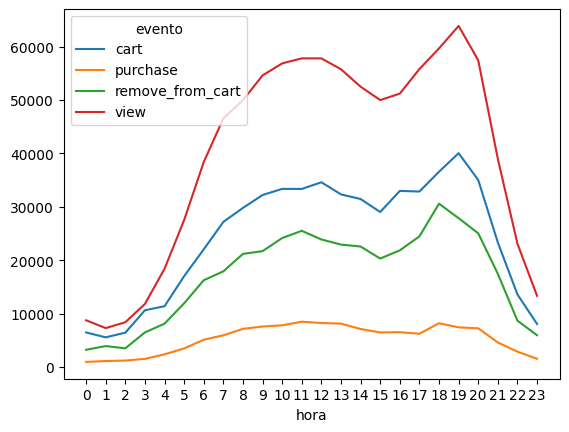

In [54]:
eventos_hora.plot()
plt.xticks(ticks = eventos_hora.index);

Existe una pauta global como era de esperar.

Pero para ver mejor las diferencias podemos crear una nueva variable que sea el ratio de compras por visita en cada hora.

In [55]:
eventos_hora['compras_visitas'] = eventos_hora.purchase / eventos_hora.view * 100
eventos_hora

evento,cart,purchase,remove_from_cart,view,compras_visitas
hora,,,,,
0,6482,962,3238,8757,10.99
1,5562,1128,3930,7297,15.46
2,6444,1220,3511,8396,14.53
3,10640,1535,6489,11821,12.99
4,11393,2389,8131,18408,12.98
5,17032,3491,11943,27544,12.67
6,22048,5125,16264,38404,13.34
7,27187,5951,17927,46558,12.78
8,29803,7158,21192,49978,14.32


reordenamoslavariable

In [56]:
eventos_hora = eventos_hora[['view','cart','remove_from_cart','purchase','compras_visitas']]
eventos_hora

evento,view,cart,remove_from_cart,purchase,compras_visitas
hora,,,,,
0,8757,6482,3238,962,10.99
1,7297,5562,3930,1128,15.46
2,8396,6444,3511,1220,14.53
3,11821,10640,6489,1535,12.99
4,18408,11393,8131,2389,12.98
5,27544,17032,11943,3491,12.67
6,38404,22048,16264,5125,13.34
7,46558,27187,17927,5951,12.78
8,49978,29803,21192,7158,14.32


Visualizamos para ver si hay horas en las que se compra proporcionalmente más.

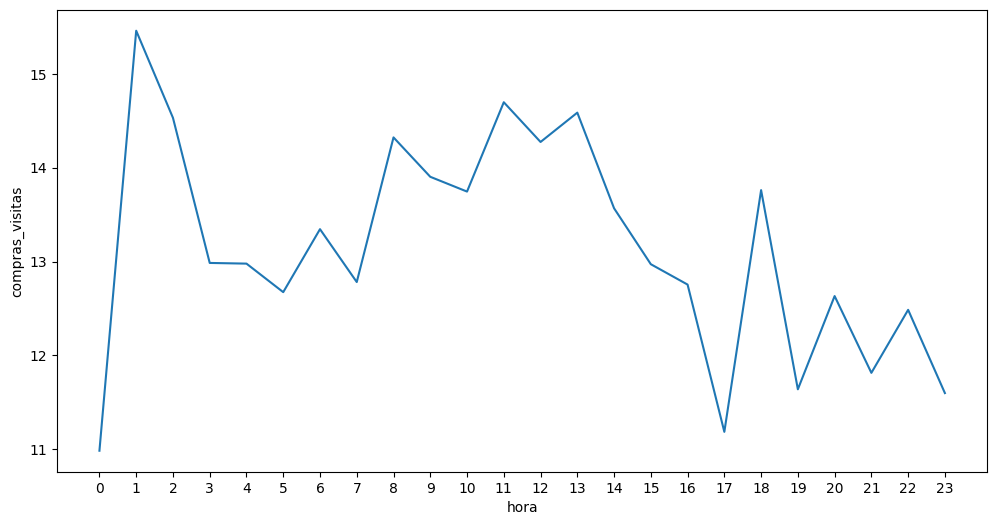

In [57]:
plt.figure(figsize = (12,6))
sns.lineplot(data = eventos_hora, x = eventos_hora.index, y = 'compras_visitas')
plt.xticks(eventos_hora.index);

Conclusiones:
    
* Las horas en las que la gente compra más son la 1, las 8, de 11 a 13 y las 18
* Las horas en las que la gente no compra son las 24, de 3 a 7, de 14 a 17 y de 19 a 23


* **INSIGHT #1**: Todas las métricas se maximzan en las franjas entre las 9 y las 13 y entre las 18 y las 20

## ¿Cúal es la media de facturación mensual?

In [60]:
df.loc[df.evento == 'purchase'].groupby('mes').precio.sum().mean()

np.float64(124309.92)

### ¿Cúal es la tendencia en los últimos meses?

In [61]:
tendencia = df.groupby('evento').resample('W').evento.count().unstack(level = 0)
tendencia

evento,cart,purchase,remove_from_cart,view
fecha,,,,
2019-10-06,31489,4440,14649,36593
2019-10-13,28156,5422,17990,44663
2019-10-20,23925,5033,15304,39775
2019-10-27,25658,5665,18414,40642
2019-11-03,24118,5746,16498,39560
2019-11-10,29176,6663,24015,46346
2019-11-17,25357,5141,17220,41287
2019-11-24,38274,9754,28033,56715
2019-12-01,32071,7493,23146,49068


In [62]:
tendencia = tendencia[['view','cart','remove_from_cart','purchase']]
tendencia

evento,view,cart,remove_from_cart,purchase
fecha,,,,
2019-10-06,36593,31489,14649,4440
2019-10-13,44663,28156,17990,5422
2019-10-20,39775,23925,15304,5033
2019-10-27,40642,25658,18414,5665
2019-11-03,39560,24118,16498,5746
2019-11-10,46346,29176,24015,6663
2019-11-17,41287,25357,17220,5141
2019-11-24,56715,38274,28033,9754
2019-12-01,49068,32071,23146,7493


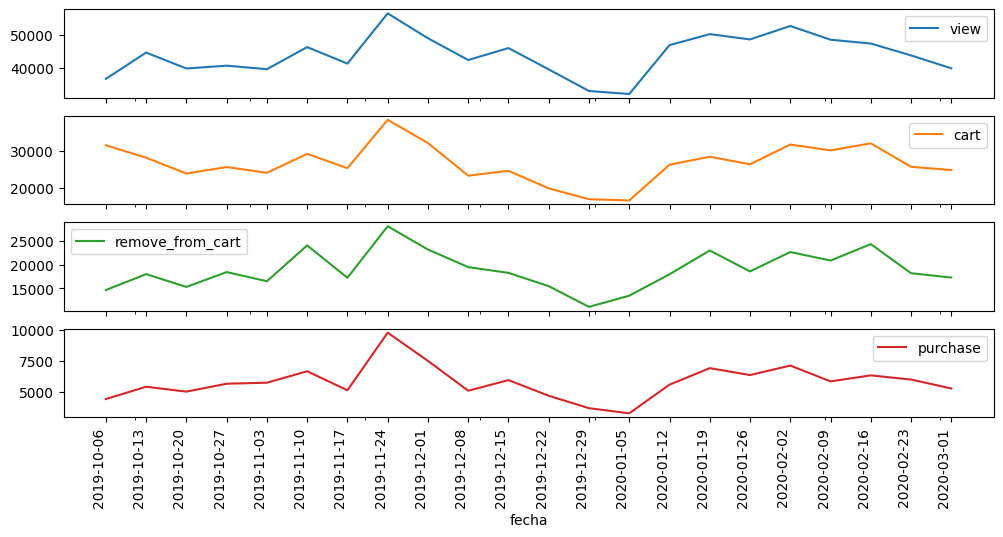

In [63]:
tendencia.plot(subplots = True, figsize = (12,6), sharex = True, xticks = tendencia.index, x_compat=True, rot = 90);

La tendencia es plana en todas las métricas, lo que confirma la necesidad de las acciones de CRO.

Existe un pico significativo en la semana del 24, obviamente por black friday, vamos a hacer el mismo análisis pero diario y solo para noviembre y dicienbre para ver el efecto.

In [69]:
tendencia_diaria = df.loc['2019-11':'2019-12'].groupby('evento').resample('D').evento.count().unstack(level = 0)
tendencia_diaria

evento,cart,purchase,remove_from_cart,view
fecha,,,,
2019-11-01,3584,709,2817,5366
2019-11-02,3015,912,2124,4864
2019-11-03,3540,755,2622,5586
2019-11-04,4652,676,4854,6253
2019-11-05,4138,753,2712,7240
...,...,...,...,...
2019-12-27,2033,507,1347,4069
2019-12-28,1746,329,1193,3716
2019-12-29,2134,263,1149,3942


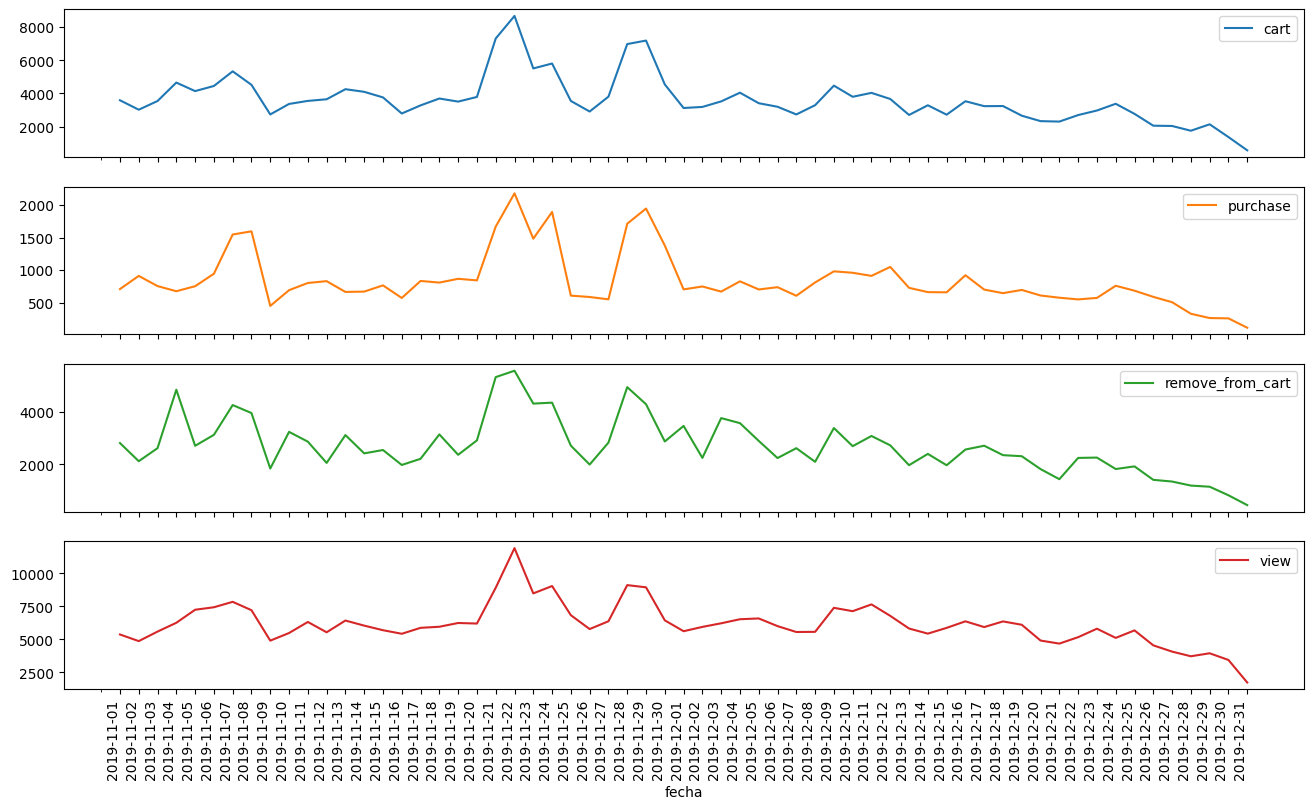

In [70]:
tendencia_diaria.plot(subplots = True, figsize = (16,10), sharex = True, xticks = tendencia_diaria.index, x_compat=True, rot = 90);

Conclusiones:

* Efectivamente el pico coincide con el black friday (día 29)
* Pero aún hay un pico mayor unos días antes, el día 22, posiblemente por el inicio de la semana black friday
* Sorprendemente los propios días de Navidad tienen una tendencia decreciente, lo que significa que los consumidores claramente han adelantado sus compras

Vamos a hacer el mismo análisis para Enero y Febrero.

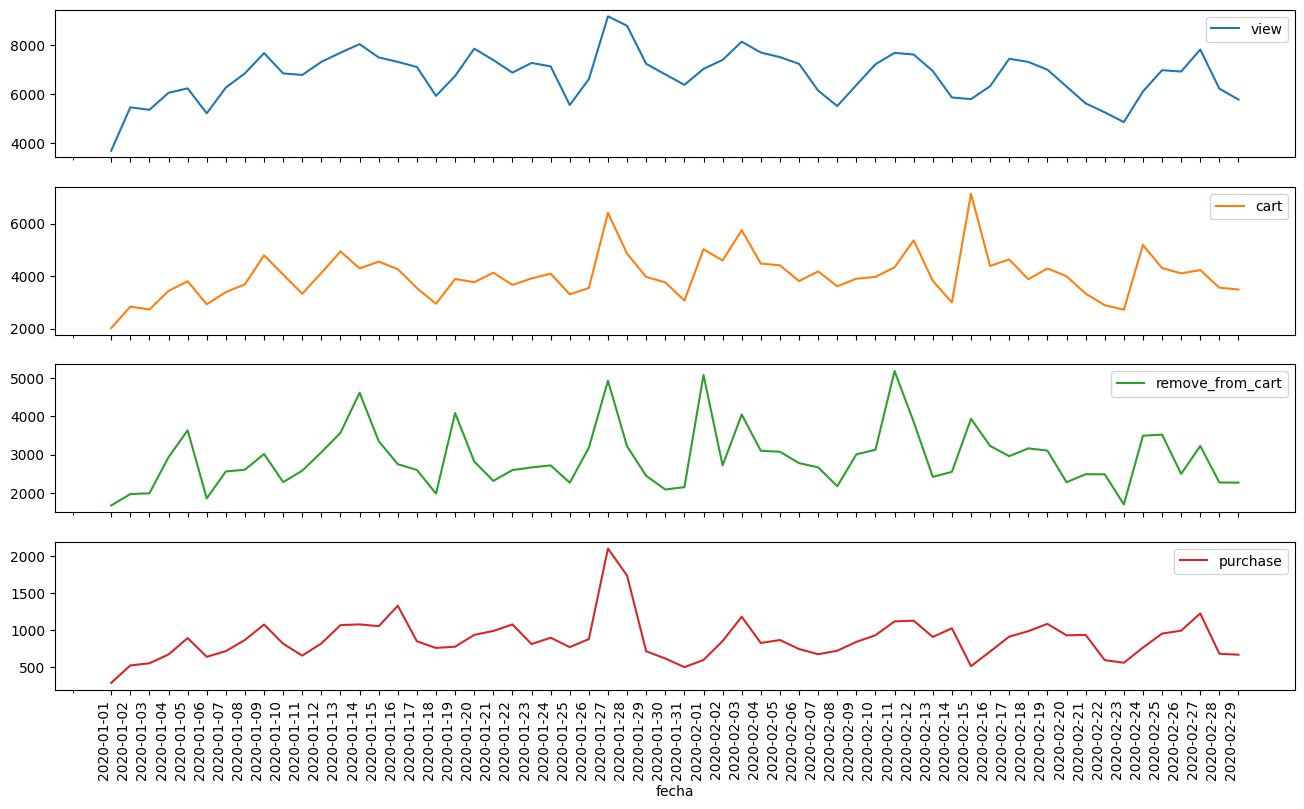

In [71]:
tendencia_diaria = df.loc['2020-01':'2020-02'].groupby('evento').resample('D').evento.count().unstack(level = 0)
tendencia_diaria = tendencia_diaria[['view','cart','remove_from_cart','purchase']]
tendencia_diaria.plot(subplots = True, figsize = (16,10), sharex = True, xticks = tendencia_diaria.index, x_compat=True, rot = 90);

Conclusiones:

* Durante la semana de Reyes tampoco hay pico de ventas
* Ni los días previos a San Valentín
* Pero sí hay un pico muy pronunciado el 27 de Enero, seguramente algún evento local

**INSIGHT #2** La gran conclusión es que todo el pastel de las compras navideñas se reparte en la semana del black friday

## Entendiendo los clientes

In [72]:
clientes = df.loc[df.evento == 'purchase'].groupby(['usuario']).agg({'producto':'count',
                                                          'sesion':'nunique', 
                                                          'precio': 'mean',
                                                          'date': 'max'})

clientes

,producto,sesion,precio,date
usuario,,,,
25392526,3,1,7.38,2019-12-18
27756757,1,1,20.63,2020-01-27
50748978,9,1,1.11,2019-12-14
52747911,3,1,7.67,2019-10-10
65241811,5,1,8.36,2019-11-11
...,...,...,...,...
621995551,5,1,2.09,2020-02-29
622021687,1,1,13.33,2020-02-29
622041514,3,1,0.63,2020-02-29


renombramos

In [73]:
clientes.columns = ['productos_tot_num','compras_tot_num','precio_medio_prod','ult_compra']
clientes

,productos_tot_num,compras_tot_num,precio_medio_prod,ult_compra
usuario,,,,
25392526,3,1,7.38,2019-12-18
27756757,1,1,20.63,2020-01-27
50748978,9,1,1.11,2019-12-14
52747911,3,1,7.67,2019-10-10
65241811,5,1,8.36,2019-11-11
...,...,...,...,...
621995551,5,1,2.09,2020-02-29
622021687,1,1,13.33,2020-02-29
622041514,3,1,0.63,2020-02-29


Vamos a calcular variables adicionales.

In [74]:
clientes['gasto_tot'] = clientes.productos_tot_num * clientes.precio_medio_prod
clientes['productos_por_compra'] = clientes.productos_tot_num / clientes.compras_tot_num
clientes

,productos_tot_num,compras_tot_num,precio_medio_prod,ult_compra,gasto_tot,productos_por_compra
usuario,,,,,,
25392526,3,1,7.38,2019-12-18,22.14,3.00
27756757,1,1,20.63,2020-01-27,20.63,1.00
50748978,9,1,1.11,2019-12-14,10.01,9.00
52747911,3,1,7.67,2019-10-10,23.02,3.00
65241811,5,1,8.36,2019-11-11,41.79,5.00
...,...,...,...,...,...,...
621995551,5,1,2.09,2020-02-29,10.46,5.00
622021687,1,1,13.33,2020-02-29,13.33,1.00
622041514,3,1,0.63,2020-02-29,1.90,3.00


## ¿Cómo se distribuyen los clientes en cuanto a gasto?

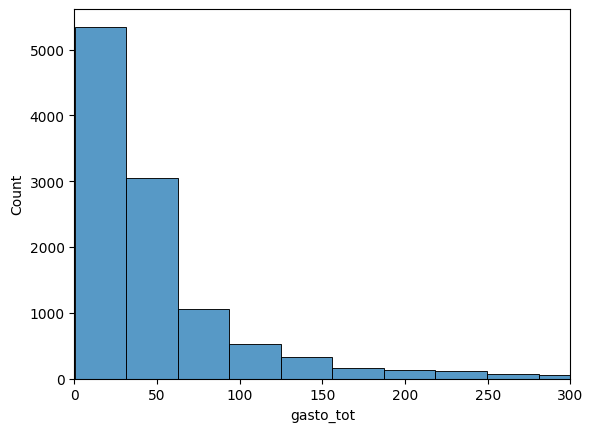

In [75]:
sns.histplot(data = clientes, x = 'gasto_tot', bins = 50)
plt.xlim([0,300]);

La gran mayoría de los clientes han gastado menos de 50€ en el período.

## ¿Cómo se distribuyen los clientes en cuanto al número de compras?

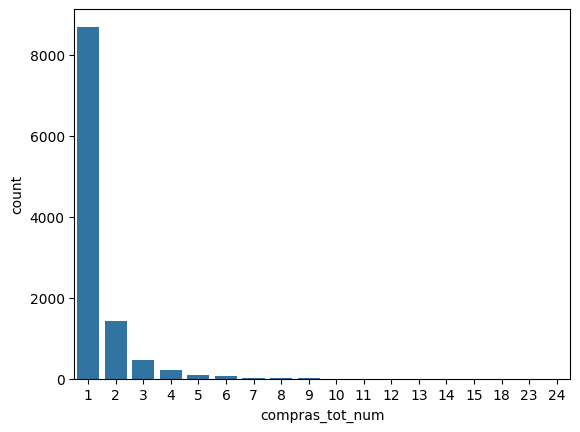

In [76]:
sns.countplot(data = clientes, x = 'compras_tot_num');

**INSIGHT #3** La gran mayoría de los clientes sólo hace una compra.

Existe gran recorrido para mejorar este ratio mediante:

* email marketing con newletters y ofertas personalizadas

## ¿Cuántos productos compra un cliente de media en cada compra?

In [80]:
clientes.productos_por_compra.describe()


count          11040.00
mean               7.79
std                9.49
min                1.00
25%                3.00
50%                5.00
75%               10.00
max              219.00
Name: productos_por_compra, dtype: float64

**INSIGHT #4** La compra mediana incluye 5 productos.

Pero un 25% de los clientes compran más de 10 productos en la misma compra.

Existe gran recorrido para mejorar este ratio mediante:

* sistemas de recomendación en el momento de la compra

## Para calcular calculamos el gasto total medio por cliente.

In [83]:
clientes.gasto_tot.describe()

count          11040.00
mean              56.30
std               81.73
min                0.13
25%               16.22
50%               32.74
75%               60.30
max             1559.21
Name: gasto_tot, dtype: float64

**INSIGHT #5** Existen clientes con gasto medio decenas de veces superior a la media.

Hay que fidelizar estos clientes mediante programas de fidelización.

## Entendiendo los productos
Vamos a crear un dataframe a nivel de producto para poder analizar esta dimensión.

Primero calculamos los conteos de cada evento en cada producto.

In [85]:
prod = df.groupby(['producto','evento']).size()
prod

producto  evento          
3752      view                 10
3762      cart                127
          purchase             28
          remove_from_cart     59
          view                258
                             ... 
5932540   view                  2
5932560   view                  1
5932578   view                  1
5932585   view                  2
5932595   view                  2
Length: 138457, dtype: int64

In [86]:
prod  = prod.unstack(level = 1).fillna(0)
prod

evento,cart,purchase,remove_from_cart,view
producto,,,,
3752,0.00,0.00,0.00,10.00
3762,127.00,28.00,59.00,258.00
3763,10.00,2.00,2.00,51.00
3771,0.00,0.00,0.00,9.00
3774,26.00,7.00,13.00,76.00
...,...,...,...,...
5932540,1.00,0.00,0.00,2.00
5932560,0.00,0.00,0.00,1.00
5932578,0.00,0.00,0.00,1.00


Vamos a incorporar el precio, para ello primero creamos un maestro de precios por producto.

In [87]:
maestro_precios = df.groupby('producto', as_index = False).precio.mean()
maestro_precios

,producto,precio
0,3752,15.71
1,3762,19.29
2,3763,16.00
3,3771,15.08
4,3774,15.92
...,...,...
46027,5932540,1.43
46028,5932560,0.00
46029,5932578,6.02
46030,5932585,6.33


In [88]:
prod = pd.merge(left = prod, right = maestro_precios, how = 'left', on = 'producto')
prod

,producto,cart,purchase,remove_from_cart,view,precio
0,3752,0.00,0.00,0.00,10.00,15.71
1,3762,127.00,28.00,59.00,258.00,19.29
2,3763,10.00,2.00,2.00,51.00,16.00
3,3771,0.00,0.00,0.00,9.00,15.08
4,3774,26.00,7.00,13.00,76.00,15.92
...,...,...,...,...,...,...
46027,5932540,1.00,0.00,0.00,2.00,1.43
46028,5932560,0.00,0.00,0.00,1.00,0.00
46029,5932578,0.00,0.00,0.00,1.00,6.02
46030,5932585,0.00,0.00,0.00,2.00,6.33


reordenamos el data

In [89]:
prod = prod[['producto','view','cart','remove_from_cart','purchase','precio']]
prod

,producto,view,cart,remove_from_cart,purchase,precio
0,3752,10.00,0.00,0.00,0.00,15.71
1,3762,258.00,127.00,59.00,28.00,19.29
2,3763,51.00,10.00,2.00,2.00,16.00
3,3771,9.00,0.00,0.00,0.00,15.08
4,3774,76.00,26.00,13.00,7.00,15.92
...,...,...,...,...,...,...
46027,5932540,2.00,1.00,0.00,0.00,1.43
46028,5932560,1.00,0.00,0.00,0.00,0.00
46029,5932578,1.00,0.00,0.00,0.00,6.02
46030,5932585,2.00,0.00,0.00,0.00,6.33


## ¿Cuales son los productos más vendidos?

In [90]:
prod.sort_values('purchase',ascending = False)[0:20]

,producto,view,cart,remove_from_cart,purchase,precio
17008,5809910,9195.00,2803.00,1255.00,764.00,5.20
28472,5854897,624.00,2486.00,793.00,483.00,0.32
6707,5700037,1150.00,2610.00,717.00,361.00,0.40
314,5304,516.00,1191.00,428.00,341.00,0.32
10020,5751422,2204.00,1125.00,630.00,331.00,10.84
15562,5802432,701.00,2495.00,745.00,322.00,0.32
17010,5809912,3059.00,1357.00,867.00,321.00,5.19
18628,5815662,1219.00,1702.00,656.00,310.00,0.91
9982,5751383,2341.00,1036.00,550.00,298.00,10.24
14195,5792800,1527.00,913.00,513.00,285.00,10.24


Posiblemente lograríamos incrementar las ventas y el ticket medio simplemente destacando estos productos en la tienda.

## ¿Hay productos que no se venden y podríamos eliminar del catálogo?

In [91]:
prod[prod.purchase == 0]

,producto,view,cart,remove_from_cart,purchase,precio
0,3752,10.00,0.00,0.00,0.00,15.71
3,3771,9.00,0.00,0.00,0.00,15.08
6,3790,10.00,0.00,0.00,0.00,7.92
8,3809,2.00,0.00,0.00,0.00,12.54
9,3812,1.00,0.00,0.00,0.00,12.54
...,...,...,...,...,...,...
46027,5932540,2.00,1.00,0.00,0.00,1.43
46028,5932560,1.00,0.00,0.00,0.00,0.00
46029,5932578,1.00,0.00,0.00,0.00,6.02
46030,5932585,2.00,0.00,0.00,0.00,6.33


INSIGHT #6: Casi la mitad de los productos no han tenido ninguna venta en los 5 meses del histórico.

Se podrían eliminar del catálogo, o como mínimo de la tienda, newsletter, etc, para que no ocupen espacio de los productos que sí se venden.



## ¿Cual es la relación entre el precio y el volumen de ventas?
Ya que este análisis incluye las ventas vamos a eliminar los productos que no han tenido ninguna.

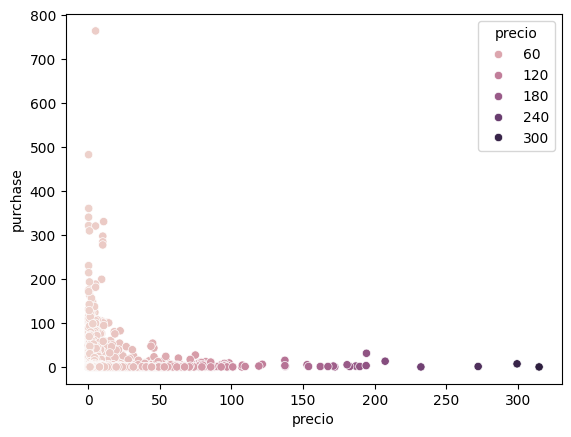

In [92]:
sns.scatterplot(data = prod[prod.purchase > 0], x = 'precio', y = 'purchase', hue = 'precio');

Sí que existe una clara relación decreciente.

Vamos a hacer zoom por ejemplo por debajo de 50€ para entenderlo mejor.

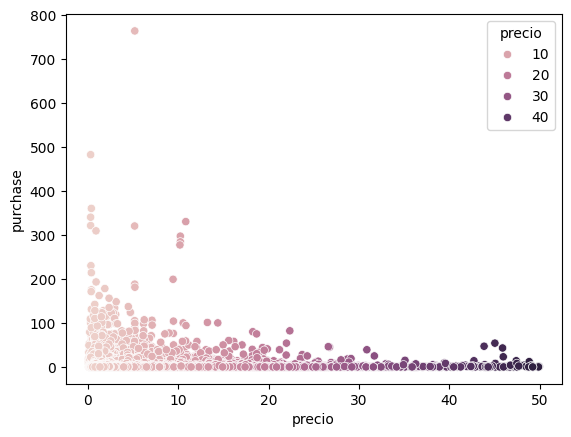

In [93]:
sns.scatterplot(data = prod[(prod.purchase > 0) & (prod.precio < 50)], x = 'precio', y = 'purchase', hue = 'precio');

## ¿Cuales son los productos más vistos?

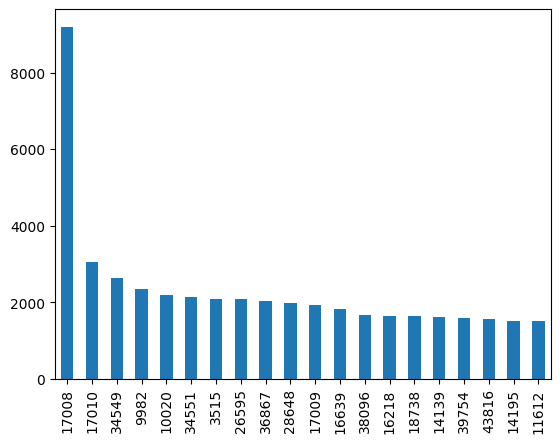

In [96]:
prod.view.sort_values(ascending = False)[0:20].plot.bar();

Posiblemente lograríamos incrementar las ventas y el ticket medio simplemente destacando estos productos en la tienda.

Siempre que además de ser vistos también se vendan.

# CONCLUSIONES

La tendencia actual es plana en todas las métricas, lo que confirma la necesidad de las acciones de CRO.

Tras el análisis realizado sobre los datos transaccionales se ha desarrollado un plan CRO de 12 iniciativas concretas organizadas en 5 grandes palancas de negocio que con alta probabilidad van a incrementar los baselines consiguiendo un incremento global de los ingresos del ecommerce.

En cada sesión, de media:

* KPIs por sesión: Se ven 2.2 productos
* KPIs por sesión: Se añaden 1.3 productos al carrito
* KPIs por sesión: Se eliminan 0.9 productos del carrito
* KPIs por sesión: Se compran 0.3 productos
* Venta cruzada: mediana de 5 productos por compra
* Recurrencia: el 10% de los clientes vuelve a comprar tras el primer mes
* Conversión: 60% de añadir al carrito sobre visualizaciones
* Conversión: 22% de compra sobre añadidos a carrito
* Conversión: 13% de compra sobre visualizaciones
* Facturación media mensual: 125.000€









